In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold, train_test_split
from scipy.stats import shapiro

In [ ]:
# Load Data
data = pd.read_csv("master.csv")

# **3. 데이터 검사**

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (1) : 데이터셋의 형태 및 상세 정보 출력

In [ ]:
print("original data's shape: ", data.shape)

print("\n==========================================")
print("++++++++++++++++++++++++++++++++++++++++++")
print("==========================================\n")

print(data.info())

original data's shape:  (27820, 12)

++++++++++++++++++++++++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (2): 데이터 셋에서의 수치 기반 통계적 정보

In [ ]:
# Basic statistical summaries
print("Original Dataset:")
data.describe()

Original Dataset:


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (3): 국가별 자살률 및 데이터 분포 분석

                    country  count
0                 Mauritius    382
1                   Austria    382
2               Netherlands    382
3                   Iceland    382
4                    Brazil    372
..                      ...    ...
96   Bosnia and Herzegovina     24
97               Cabo Verde     12
98                 Dominica     12
99                    Macau     12
100                Mongolia     10

[101 rows x 2 columns]


C:\TempFolder\ipykernel_28364\2333379222.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=country_counts, palette='viridis')


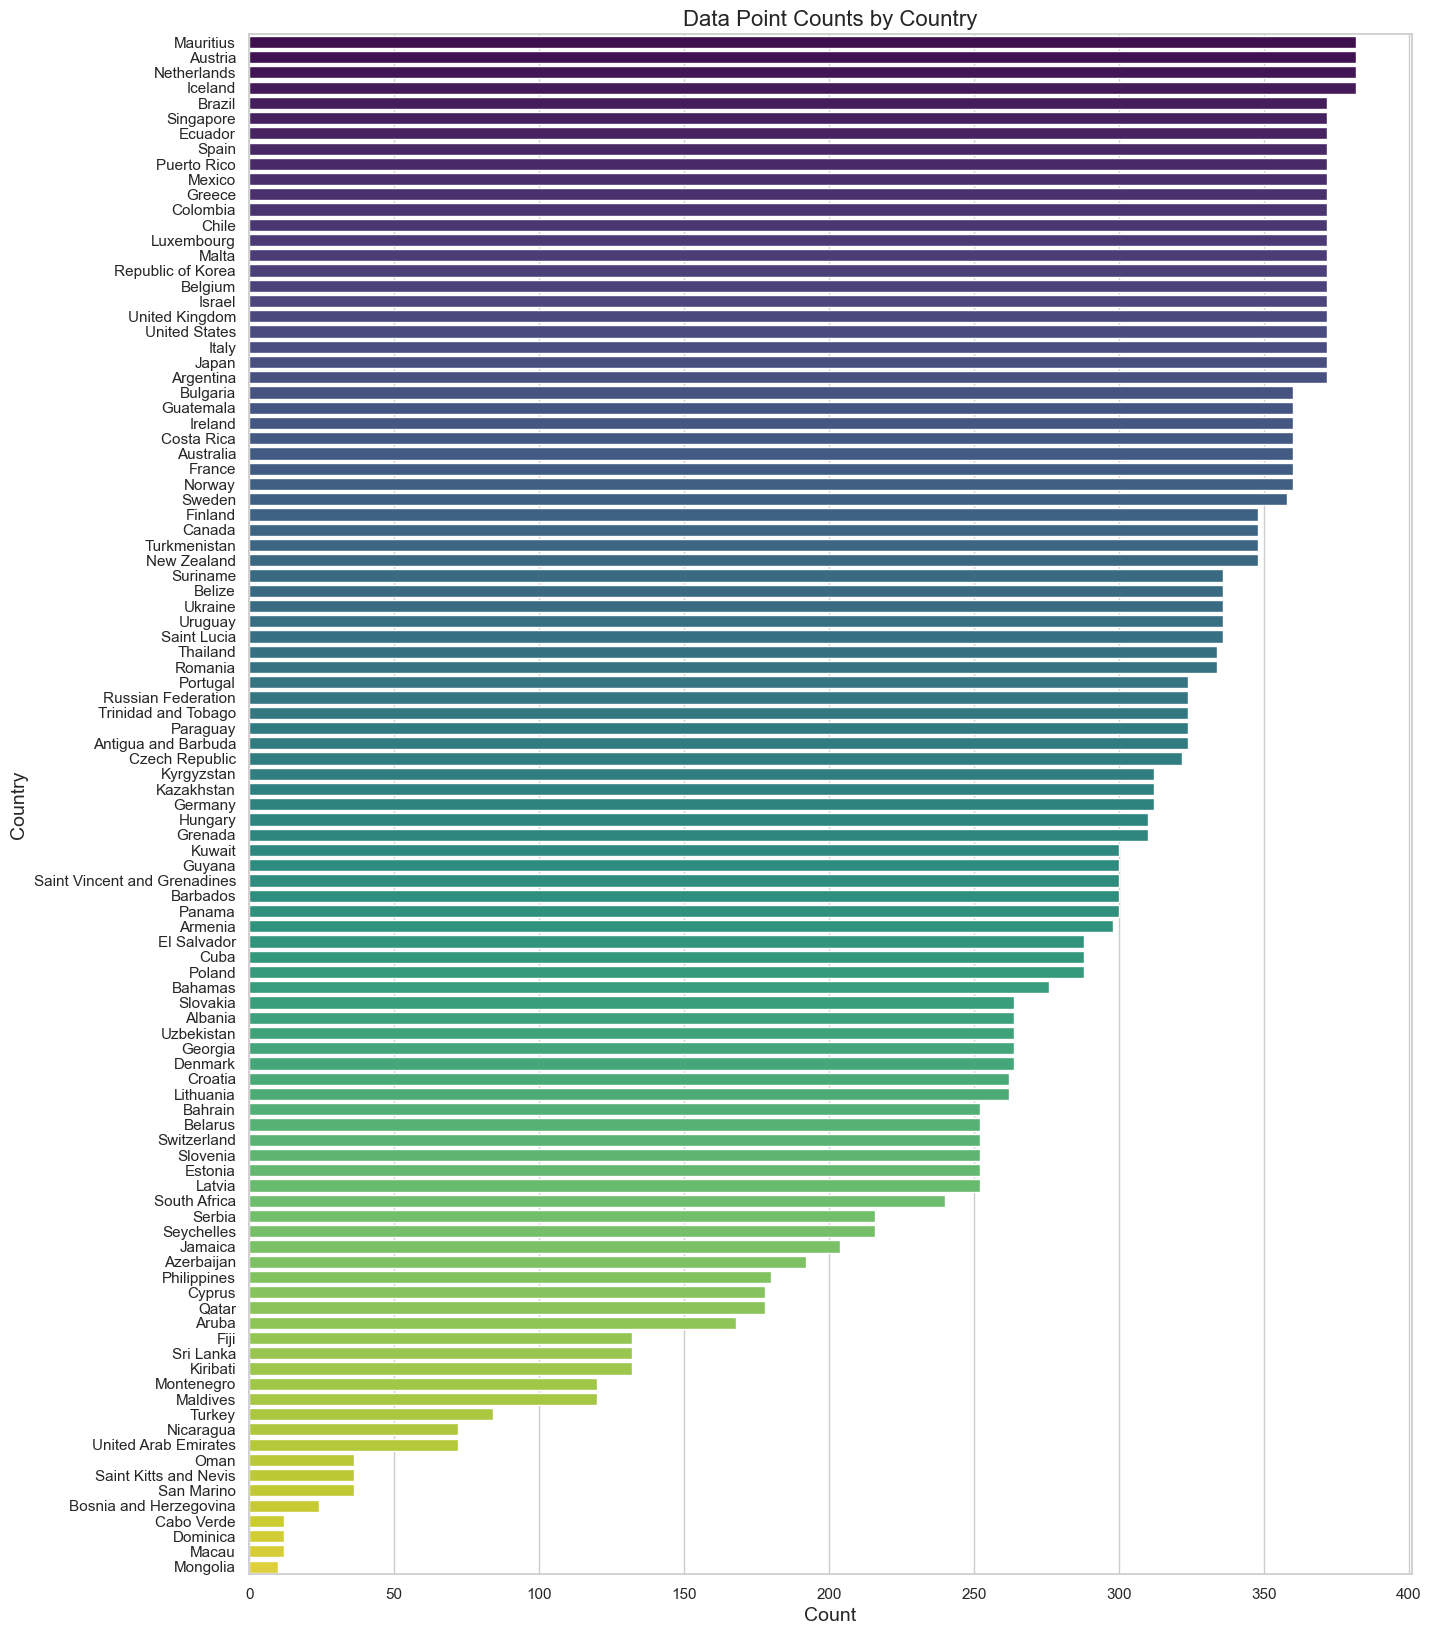

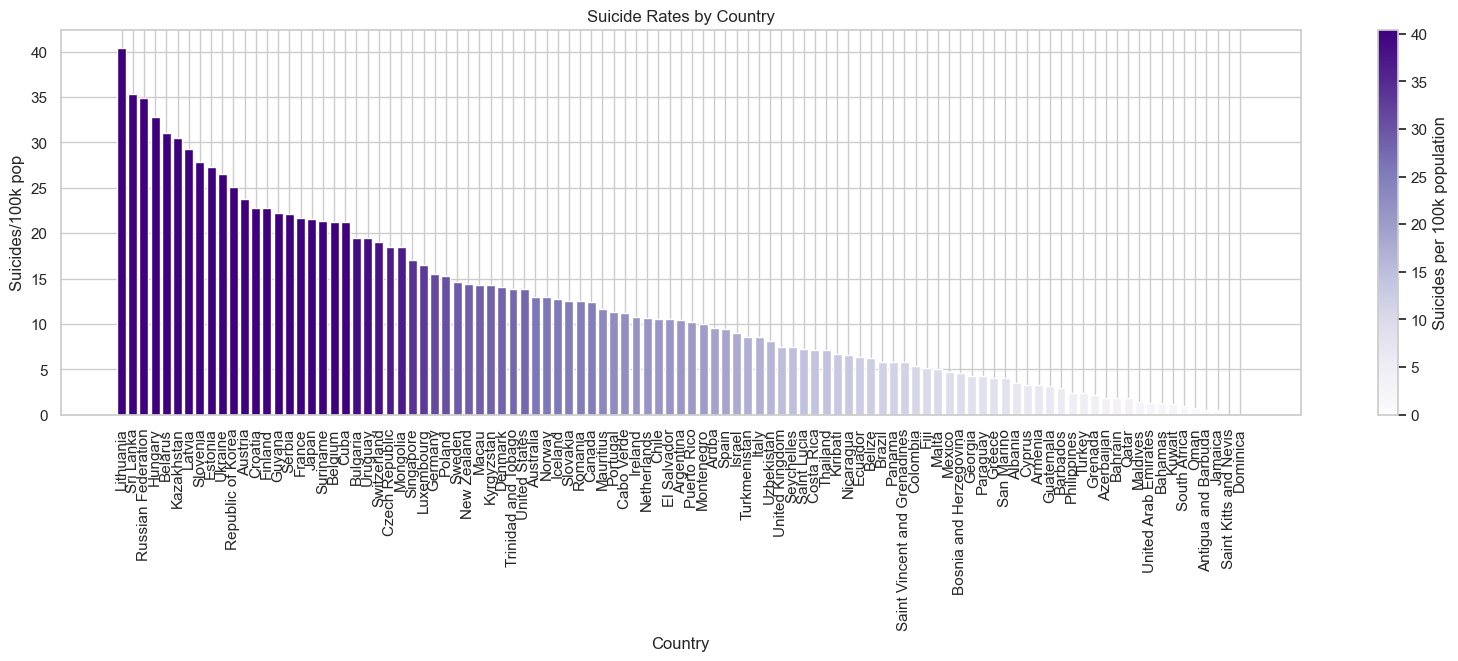

,country,suicides/100k pop
52,Lithuania,40.415573
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
40,Hungary,32.761516
11,Belarus,31.075913


In [ ]:
# Check suicide rates by country

# Calculate the count of data points for each country
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Print the country counts
print(country_counts)

# Display the country counts as a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
sns.barplot(x='count', y='country', data=country_counts, palette='viridis')
plt.title('Data Point Counts by Country', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

# Calculate mean suicide rates by country
mean_suicide_rates_country = data[['country', 'suicides/100k pop']].groupby('country', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Adjusted normalization to make lower values slightly darker
norm = plt.Normalize(mean_suicide_rates_country['suicides/100k pop'].min(), mean_suicide_rates_country['suicides/100k pop'].max())
sm = plt.cm.ScalarMappable(cmap="Purples", norm=norm)
sm.set_array([])

# Plot the bar plot with continuous color palette
fig, ax = plt.subplots(figsize=(20, 5))
colors = plt.cm.Purples(norm(mean_suicide_rates_country['suicides/100k pop'] * 2))  # Multiply by 2 to make colors darker
bars = ax.bar(mean_suicide_rates_country['country'], mean_suicide_rates_country['suicides/100k pop'], color=colors)

# Add color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Suicides per 100k population')

plt.title("Suicide Rates by Country")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Suicides/100k pop")
plt.show()

# Top 5 Countries: Lithuania, Sri Lanka, Russia, Hungary, Belarus // Korea: 11th
data[['country','suicides/100k pop']].groupby('country', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False).head()

### **국가 별 데이터 포인트 수**
모리셔스, 오스트리아, 네덜란드, 아이슬란드의 데이터 포인트 수가 가장 많다

### **국가별 자살률**
각 국가별 10만명 당 자살률: 리투아니아, 스리랑카, 러시아 연방 등의 자살률이 높게 나왔다

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (4): 연도별 자살률 변화 시각화

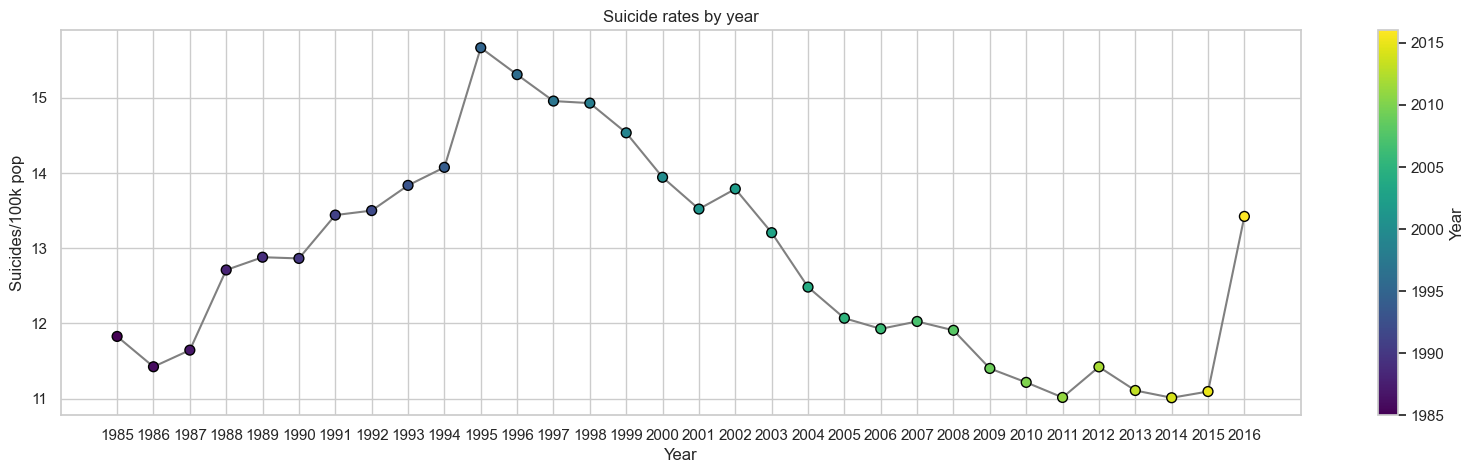

,year,suicides/100k pop
10,1995,15.662671
11,1996,15.305422
12,1997,14.954361
13,1998,14.926920
14,1999,14.532038


In [ ]:
# Visualization of suicide rates by year
# Calculate mean suicide rates by year
mean_suicide_rates_year = data[['year', 'suicides/100k pop']].groupby('year', as_index=False).mean().sort_values(by='year', ascending=True)

# Create the plot with diverse colors
fig, ax = plt.subplots(figsize=(20, 5))
plt.title("Suicide rates by year")

# Use scatterplot to apply diverse colors
points = ax.scatter(mean_suicide_rates_year['year'], mean_suicide_rates_year['suicides/100k pop'], c=mean_suicide_rates_year['year'], cmap='viridis', s=50, edgecolor='black', zorder=2)
ax.plot(mean_suicide_rates_year['year'], mean_suicide_rates_year['suicides/100k pop'], color='grey', zorder=1)

# Add color bar
cbar = plt.colorbar(points)
cbar.set_label('Year')

# Set x-ticks
ax.set(xticks=data["year"].unique())
plt.xlabel("Year")
plt.ylabel("Suicides/100k pop")
plt.show()
# Top 5 years: 1995, 1996, 1997, 1998, 1999
data[['year', 'suicides/100k pop']].groupby('year', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False).head()

### **그래프 분석**
1985년부터 1995년까지 자살률이 상승 추세를 보이다가 1995년을 정점으로 점진적으로 감소하였다. 그 후, 2000년대 초반을 지나면서 더욱 감소하는 추세를 보였지만, 2015년 이후 급격한 상승을 보여 2016년에는 크게 증가하였다

### **표 분석**
1995년부터 1999년까지의 연도가 차례로 자살률이 가장 크게 나타난 연도로 기록돼있다

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (5): 성별에 따른 자살률 비교

C:\TempFolder\ipykernel_28364\752503466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="suicides/100k pop", data=mean_suicide_rates, palette=colors)


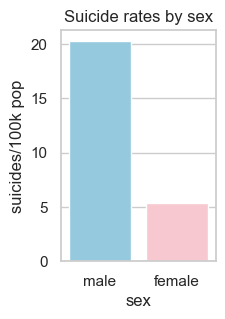

In [ ]:
# Identifying and ranking suicide rates by gender
# Calculate mean suicide rates by gender
mean_suicide_rates = data[["sex", "suicides/100k pop"]].groupby("sex", as_index=False).mean().sort_values(by="suicides/100k pop", ascending=False)

# Create a color palette
colors = ['skyblue' if sex == 'male' else 'pink' for sex in mean_suicide_rates['sex']]

# Plot the bar plot
fig = plt.figure(figsize=(2, 3))
plt.title("Suicide rates by sex")
sns.barplot(x="sex", y="suicides/100k pop", data=mean_suicide_rates, palette=colors)
plt.show()

### **그래프 분석**
남성의 자살률이 10만명 당 약 20명, 여성은 약 5명으로 남성의 자살률이 여성의 자살률보다 약 4배가량 높은 것을 알 수 있다

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (6): 연령별 및 성별 자살률 비교 분석

C:\TempFolder\ipykernel_28364\1918697257.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='age', y='suicides/100k pop', hue='sex', data=mean_suicide_rates_age_sex, palette=palette)


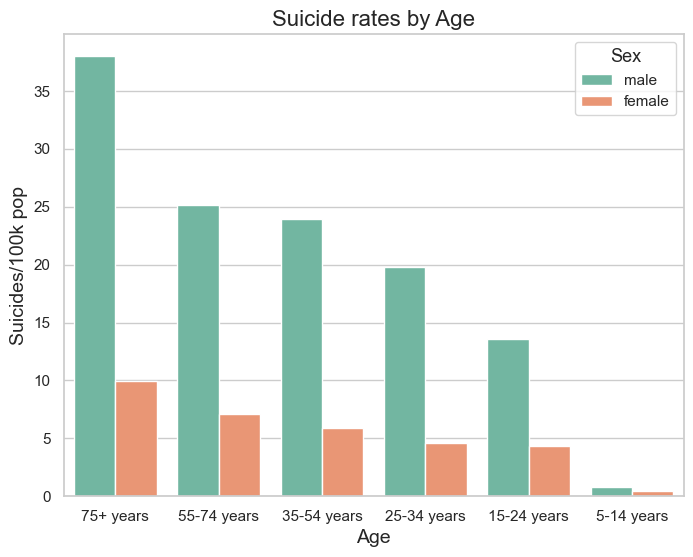

In [ ]:
# Identifying and ranking suicide rates by age group
# Calculate mean suicide rates by age group and sex
mean_suicide_rates_age_sex = data[['age', 'suicides/100k pop', 'sex']].groupby(['age', 'sex'], as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Create the plot with an improved style
fig = plt.figure(figsize=(8, 6))
plt.title('Suicide rates by Age', fontsize=16)

# Use a custom color palette
palette = sns.color_palette("Set2")

# Plot the bar plot
sns.barplot(x='age', y='suicides/100k pop', hue='sex', data=mean_suicide_rates_age_sex, palette=palette)

# Customize the axes labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Suicides/100k pop', fontsize=14)

# Adjust the legend
plt.legend(title='Sex', title_fontsize='13', fontsize='11')

plt.show()

### **그래프 분석**
모든 연령대에서 남성의 자살률이 여성보다 높게 나타나고 있으며, 특히 75세 이상에서 가장 높은 자살률을 보이고 있다. 여성의 경우에는 남성보다는 낮지만, 연령대가 높아질수록 자살률이 증가하는 경향을 보인다. 다만, 여전히 남성에 비해 상대적으로 낮은 수치를 유지하고 있다

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (7): 1인당 GDP에 따른 자살률 시각화 

In [ ]:
# Group data and calculate averages
grouped_data = data[['gdp_per_capita ($)', 'suicides/100k pop']].groupby('gdp_per_capita ($)', as_index=False).mean().sort_values(by='gdp_per_capita ($)', ascending=True)

# Create a bar plot
plt.figure(figsize=(30, 10))
plt.title("Suicide Rates by GDP per Capita", fontsize=20, weight='bold')
sns.barplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=grouped_data, palette="viridis")

# Effectively manage x-axis labels
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees to enhance readability
plt.xlabel('GDP per Capita ($)', fontsize=15, weight='bold')
plt.ylabel('Suicides per 100k Population', fontsize=15, weight='bold')

plt.grid(True)  # Add a grid
plt.show()

# Describe the statistics for GDP per capita
gdp_statistics = data['gdp_per_capita ($)'].describe()
print(gdp_statistics)

C:\TempFolder\ipykernel_28364\121583752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=grouped_data, palette="viridis")


### **그래프 분석**
1인단 GDP가 낮을수록 자살률이 높아지는 경향이 약간 보이지만, GDP가 높든 낮든지간에 자살률의 분포는 유사하다 -> 1인당 GDP는 자살률과 관련의 거의 없다

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (8): 세대별 자살 데이터 분석 및 비교

C:\TempFolder\ipykernel_28364\2293280529.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='generation', data=data, ax=ax[1], order=generation_order, palette=colors)


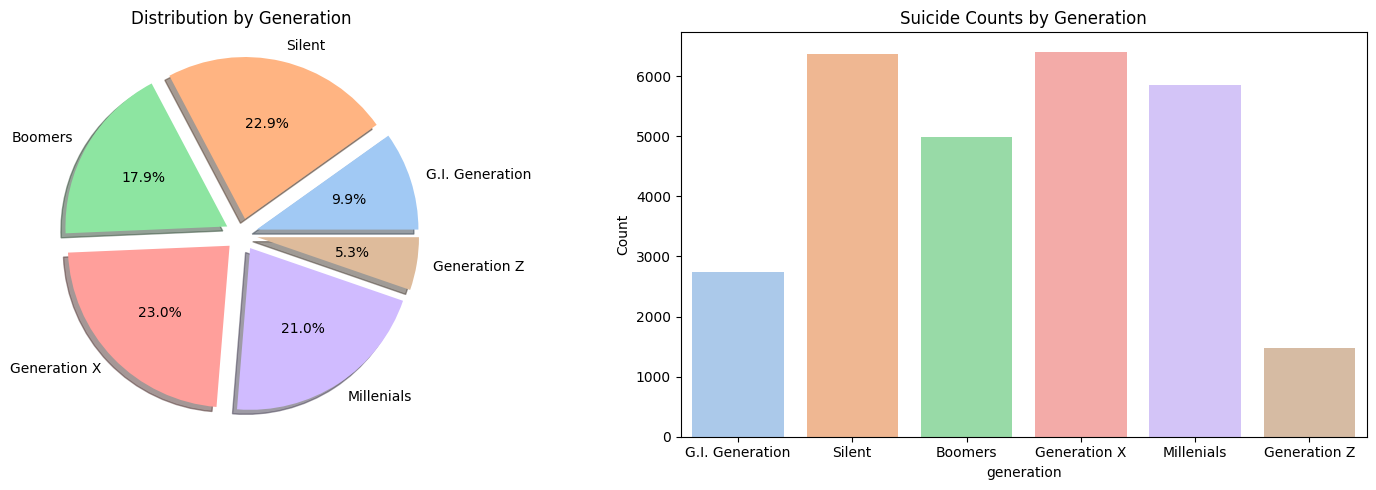

In [ ]:
# Checking the suicide rate according to Generation

# Define a pastel color palette for generations
generation_order = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']
pastel_colors = sns.color_palette('pastel', len(generation_order))
generation_colors = {generation_order[i]: pastel_colors[i] for i in range(len(generation_order))}
colors = [generation_colors[gen] for gen in generation_order]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot pie chart for generation counts
data['generation'].value_counts().reindex(generation_order).plot.pie(
    explode=[0.1] * len(generation_order), 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True, 
    colors=colors
)
ax[0].set_title('Distribution by Generation')
ax[0].set_ylabel('')

# Plot count plot for suicide rates by generation
sns.countplot(x='generation', data=data, ax=ax[1], order=generation_order, palette=colors)
ax[1].set_title('Suicide Counts by Generation')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### **그래프 분석**
Silent 세대와 X 세대, Milennials 세대가 상대적으로 높은 자살률을 보이는 것을 알 수 있다 -> 이 세대들이 자살에 대한 높은 위험을 가지고 있을 가능성 제시

#### *G.I Generation*  
    출생 연도: 1901년부터 1927년 사이
#### *Silent Generation*
    출생 연도: 1928년부터 1945년 사이
#### *Baby Boomers*
    출생 연도: 1946년부터 1964년 사이
#### *Generation X*
    출생 연도: 1965년부터 1980년 사이
#### *Millennials*
    출생 연도: 1981년부터 1996년 사이
#### *Generation Z*
    출생 연도: 1997년부터 2012년 사이

### **3 - 1: 데이터의 경향 및 분포 확인하기**

#### (9): 국가 및 세대별 자살률 시각화

c:\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


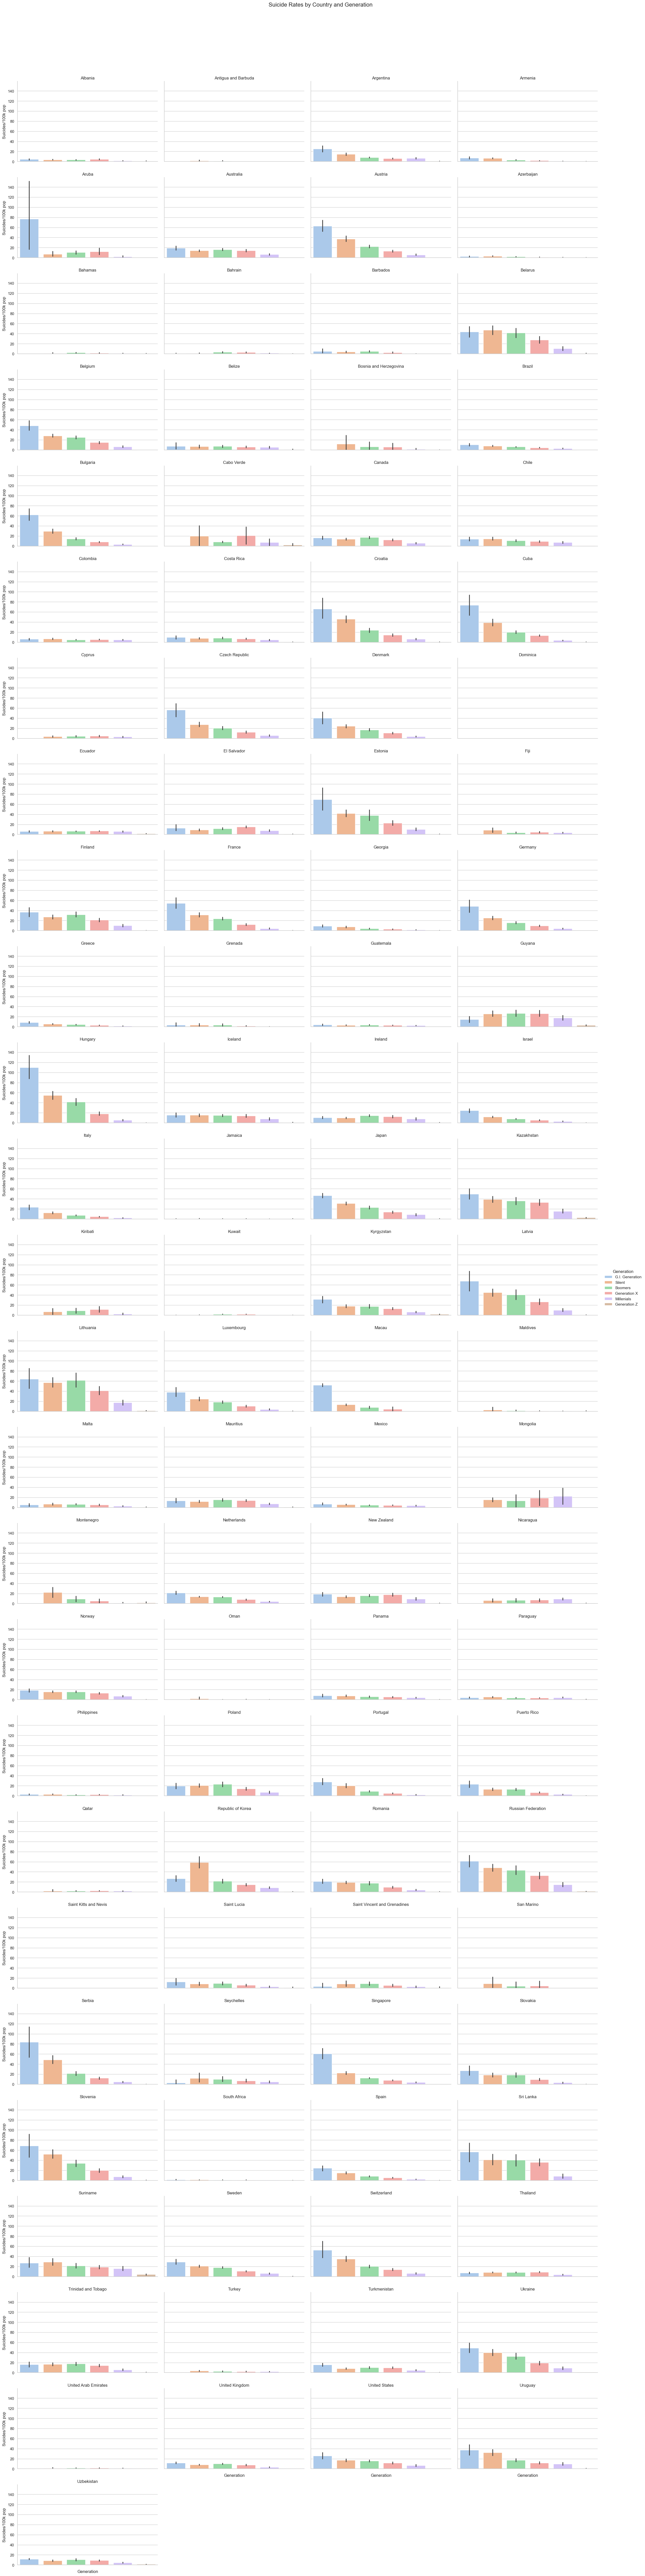

In [ ]:
# Assuming data has been loaded and column names verified
generation_order = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']
pastel_colors = sns.color_palette('pastel', len(generation_order))
sns.set(style="whitegrid")

g = sns.FacetGrid(data, col="country", col_wrap=4, height=4, aspect=1.5, hue="generation", palette=pastel_colors, hue_order=generation_order)
g.map(sns.barplot, "generation", "suicides/100k pop")
g.add_legend(title="Generation")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Generation", "Suicides/100k pop")
g.set_titles("{col_name}")
g.fig.suptitle('Suicide Rates by Country and Generation', fontsize=16)
g.fig.subplots_adjust(top=0.95)
plt.show()

### **그래프 분석**

**한국**: 
<p>
X 세대에서 비교적 높은 자살률을 보여주며, 각 세대 별로 자살률의 분포가 대체적으로 유사하다
</p>

**일본**: 
<p>
한국과 유사하게 X 세대에서 비교적 높은 자살률을 보이며 각 세대 별로 자살률의 분포가 유사하다
</p>

**이탈리아**:
<p>
 G.I. 세대에서의 자살률이 가장 높게 나타나며, 전쟁 세대의 노년기 문제와 연관이 있을 것으로 보인다
 <p>

**바하마**: 
<p>
관광 산업에 크게 의존하고 있는 카리브해에 위치한 섬나라인 바하마는 특정 세대인 G.I. 세대의 자살률이 다른 세대의 자살률보다 높게 나타나고 있다. 경제적 불안정성이나 글로벌 경제 위기의 시기로부터 영향을 받았다고 판단할 수 있다
</p>


### **3 - 2: 데이터의 분포 방식 조사하기**

**통계값**(stistics)이 1에 가까울수록 데이터가 정규분포에 가깝다는 것을 의미

**p-값**(p-values)이 0.05 또는 0.01 이하이면 데이터가 정규분포를 따르지 않는다고 정의내릴 수 있다

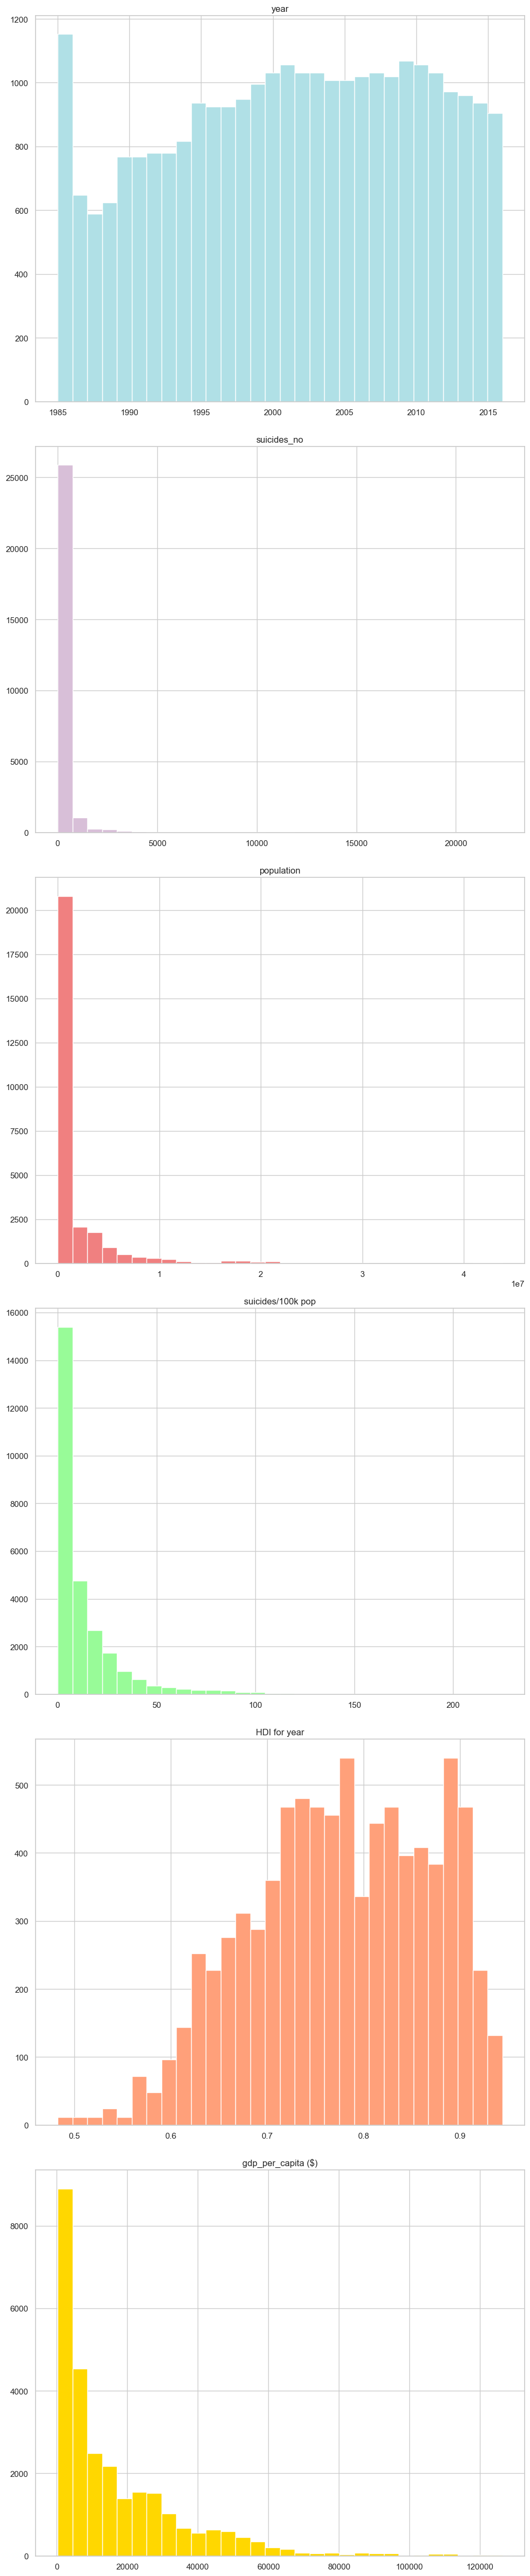

year: Statistics=0.963, p=0.000
population: Statistics=0.491, p=0.000
HDI for year: Statistics=nan, p=1.000
suicides_no: Statistics=0.254, p=0.000
suicides/100k pop: Statistics=0.671, p=0.000
gdp_per_capita ($): Statistics=0.786, p=0.000


C:\TempFolder\ipykernel_28364\775176831.py:20: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27820.
  stat, p = shapiro(data['year'])
C:\TempFolder\ipykernel_28364\775176831.py:24: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27820.
  stat, p = shapiro(data['population'])
C:\TempFolder\ipykernel_28364\775176831.py:28: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27820.
  stat, p = shapiro(data['HDI for year'])
C:\TempFolder\ipykernel_28364\775176831.py:32: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27820.
  stat, p = shapiro(data['suicides_no'])
C:\TempFolder\ipykernel_28364\775176831.py:36: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27820.
  stat, p = shapiro(data['suicides/100k pop'])
C:\TempFolder\ipykernel_28364\7

In [ ]:
# Filter only numeric data (int and float types)
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Define pastel color array
colors = ['powderblue', 'thistle', 'lightcoral', 'palegreen', 'lightsalmon', 'gold']

# Set the size of the entire plot
plt.figure(figsize=(10, 8 * len(numeric_data.columns)))  # Multiply the height of each plot by the number of columns to determine the total height

# Create and position a subplot for each numeric column
for i, column in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns), 1, i + 1)  # Position the subplot (n rows, 1 column at position i+1)
    numeric_data[column].hist(color=colors[i % len(colors)], bins=30)  # Draw histogram
    plt.title(column)  # Set the title for each subplot

plt.tight_layout()  # Automatically adjust the spacing between subplots
plt.show()  # Display the graph

# Normality test for a year column
stat, p = shapiro(data['year'])
print('year: Statistics=%.3f, p=%.3f' % (stat, p))

# Normality test for a population column
stat, p = shapiro(data['population'])
print('population: Statistics=%.3f, p=%.3f' % (stat, p))

# Normality test for a HDI for year column
stat, p = shapiro(data['HDI for year'])
print('HDI for year: Statistics=%.3f, p=%.3f' % (stat, p))

# Normality test for a suicides_no column
stat, p = shapiro(data['suicides_no'])
print('suicides_no: Statistics=%.3f, p=%.3f' % (stat, p))

# Normality test for a suicides/100k pop column
stat, p = shapiro(data['suicides/100k pop'])
print('suicides/100k pop: Statistics=%.3f, p=%.3f' % (stat, p))

# Normality test for a gdp_per_capita ($) column
stat, p = shapiro(data['gdp_per_capita ($)'])
print('gdp_per_capita ($): Statistics=%.3f, p=%.3f' % (stat, p))

### **3-3: 이상치 식별하기**

**박스 플롯**을 사용해 **IOR**(사분위 범위)을 계산하여 이상치를 구함

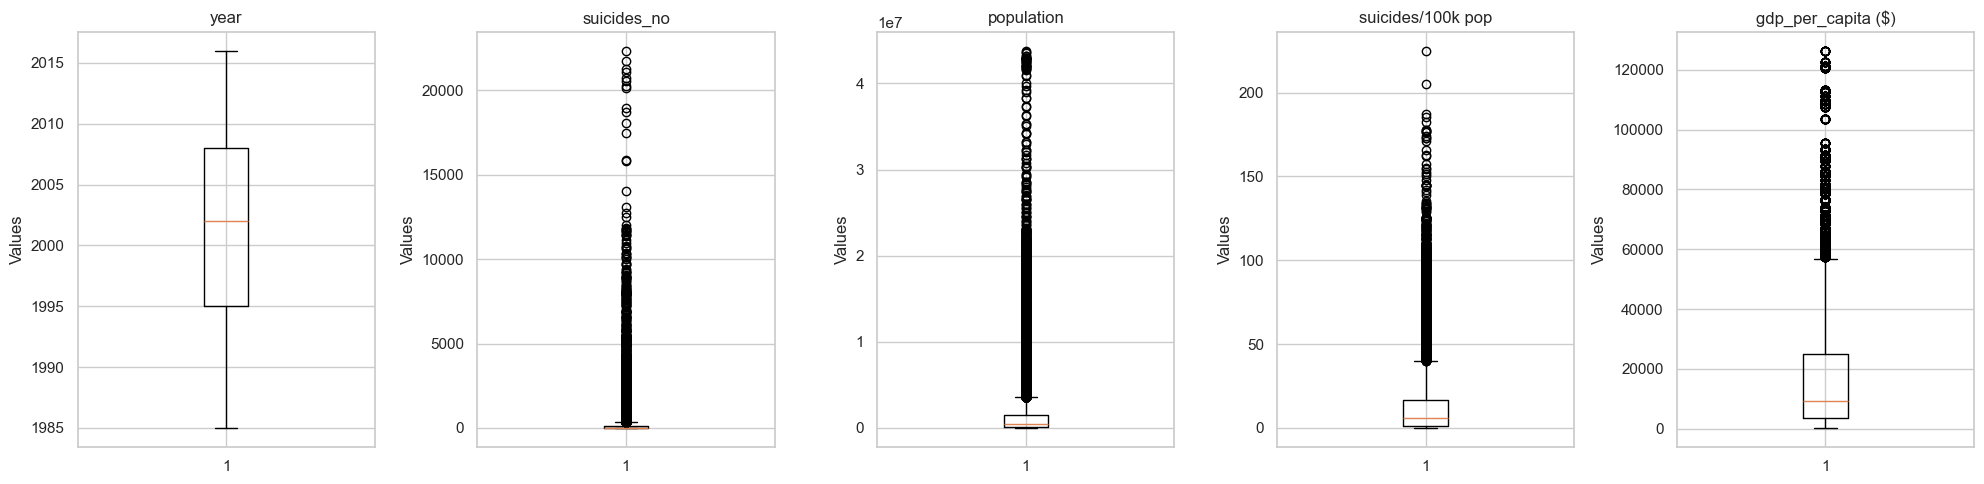

In [ ]:
# Subplot Settings
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Create a box plot for each variable
columns = ['year', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
for i, col in enumerate(columns):
    axes[i].boxplot(data[col].dropna())  # Remove NA value
    axes[i].set_title(col)
    axes[i].set_ylabel('Values')

# Adjust the full layout
plt.tight_layout()
plt.show()

### **year**

#### 데이터가 시간에 따라 고르게 분포돼있다. 이상치는 없으며, 데이터가 1980년대 중반부터 2015년까지 포함되어있다.

### **suicides_no**

#### 대부분 데이터가 낮은 범위에 몰려 있지만, 매우 높은 수치를 보이는 이상치들이 다수 존재한다. -> 특정 국가나 연도에서 예외적으로 높은 자살 건수가 있음을 시사

### **population**

#### 대부분의 값이 낮은 범위에 집중돼 있고, 매우 큰 인구 수를 가진 몇몇 국가에서 높은 값을 나타내는 이상치가 존재한다. -> 대규모 인구를 가진 국가들의 데이터가 포함되어 있음을 의미

### **suicides/100k pop**

#### 대부분의 데이터가 0부터 50 사이에 분포하고 있으며, 일부 높은 자살률을 나타내는 이상치들이 있다. -> 특정 지역이나 집단에서 상대적으로 높은 자살률을 보이고 있음을 나타냄

### **gdp_per_capita ($)**

#### 대부분의 값이 상대적으로 낮은 범위에 위치하고 있으나, 상당히 높은 GDP를 가진 국가들의 이상치가 많이 관찰된다. -> 경제적으로 높은 수준을 나타내는 국가들의 데이터가 포함돼 있음을 의미

### **요소들 간의 연관 관계 조사하기**

변수 간의 상관관계 파악을 위해 산점도와 상관관계 행렬을 사용한다

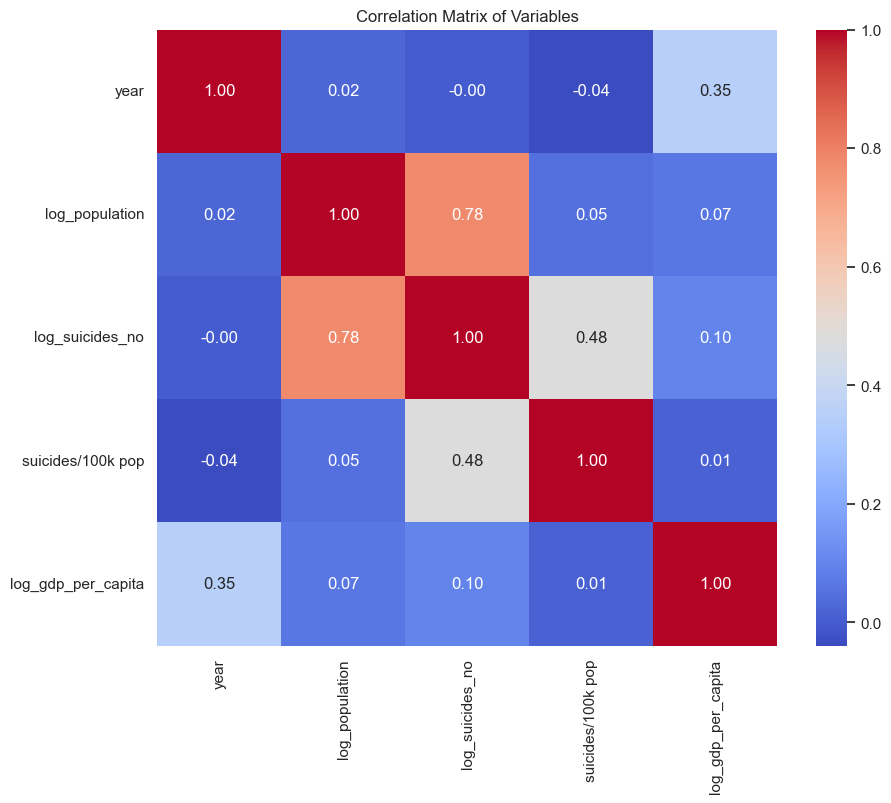

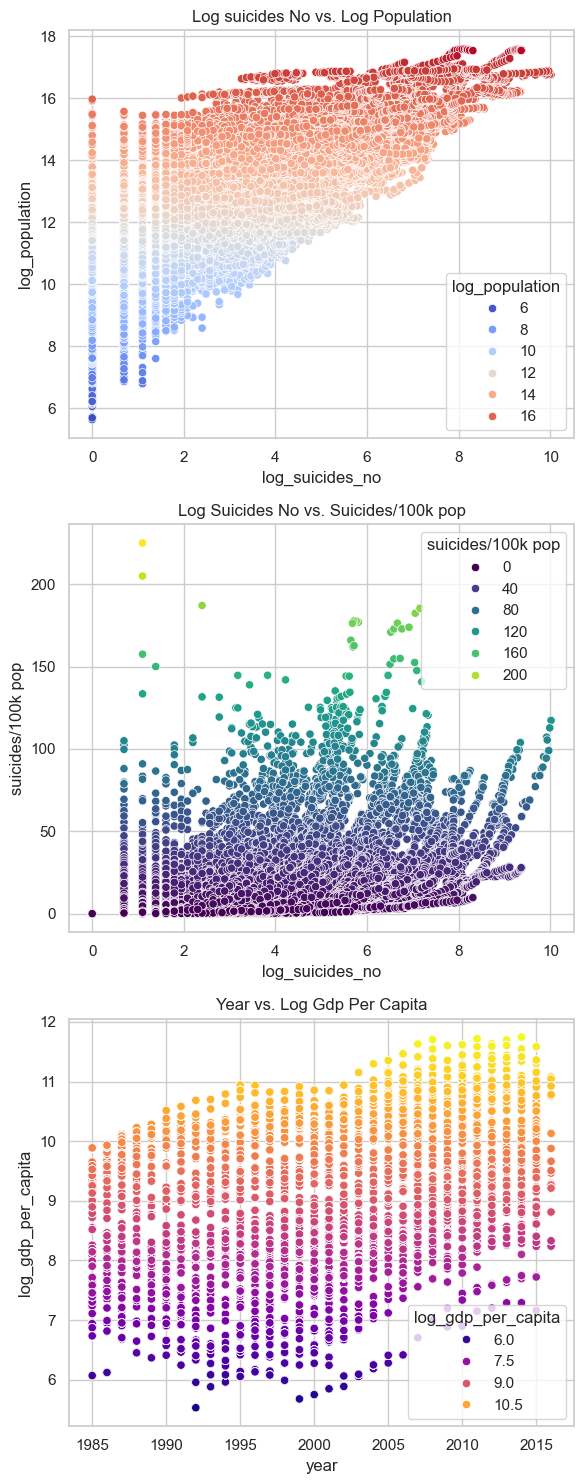

In [ ]:
# Apply log transformation to reduce the impact of outliers
data['log_population'] = np.log1p(data['population'])
data['log_suicides_no'] = np.log1p(data['suicides_no'])
data['log_gdp_per_capita'] = np.log1p(data['gdp_per_capita ($)'])

# Correlation matrix
# Select numeric columns including transformed ones
numeric_cols = ['year', 'log_population', 'log_suicides_no', 'suicides/100k pop', 'log_gdp_per_capita']
correlation_matrix = data[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Set the overall size of the plot
plt.figure(figsize=(6, 15))

# First subplot: Log suicides No vs. Log Population
plt.subplot(3, 1, 1)
sns.scatterplot(x='log_suicides_no', y='log_population', data=data, hue='log_population', palette='coolwarm')  # Apply color variation based on 'log_population'
plt.title('Log suicides No vs. Log Population')

# Second subplot: Log Suicides No vs. Suicides/100k pop
plt.subplot(3, 1, 2)
sns.scatterplot(x='log_suicides_no', y='suicides/100k pop', data=data, hue='suicides/100k pop', palette='viridis')  # Apply color variation based on 'suicides/100k pop'
plt.title('Log Suicides No vs. Suicides/100k pop')

# Third subplot: Year vs. Log Gdp Per Capita
plt.subplot(3, 1, 3)
sns.scatterplot(x='year', y='log_gdp_per_capita', data=data, hue='log_gdp_per_capita', palette='plasma')  # Apply color variation based on 'log_gdp_per_capita'
plt.title('Year vs. Log Gdp Per Capita')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

### **상관 관계 행렬(Correlation Matrix of Variables)**

1. **로그 인구(log_population)** 와 **로그 자살 건수(log_suicides_no)** 간에 *0.78*의 상관 계수를 보여줘 두 변수 간에 상당히 높은 양의 상관 관계가 있음을 의미 -> 인구가 많은 곳에서 자살 건수도 많은 경향이 있다

2. **자살률(suicides/100k pop)** 은 **자살 건수(log_suicides_no)** 와 *0.48*의 상관 계수를 보임 -> 자살 건수가 많을수록 자살률도 높다

3. **1인당 GDP(log_gdp_per_capita)** 는 **연도(year)** 와 *0.35*의 상관 계수를 가지며, 시간이 지남에 따라 1인당 GDP가 증가하는 경향을 보임

### **산점도 분석**

1. **로그 자살 건수 대비 로그 인구 (Log suicides No vs. Log Population)**
전반적으로 자살 건수가 증가함에 따라 인구도 증가하는 경향을 보인다. -> 자살 건수가 많은 곳은 대체로 인구 수도 많은 경향이 있음을 시사

2. **로그 자살 건수 대비 10만 명당 자살률 (Log Suicides No vs. Suicides/100k pop)**
자살 건수가 낮은 범위에서는 자살률이 상대적으로 낮거나 큰 차이 없이 분포하는 경향이 있다. 또 자살 건수가 증가함에 따라 자살률도 증가하는 경향을 보이지만, 특정 지점에서 자살률의 증가 폭이 커지는 현상이 관찰된다. -> 자살 건수가 많은 특정 지역이나 집단에서 자살률이 비약적으로 높아질 수 있음을 나타냄

3. **로그 GDP 대비 연도 (Log Gdp Per Capita vs. Year)**
데이터 포인트들이 시간이 흐름에 따라 1인당 GDP가 점진적으로 증가하는 추세를 나타낸다. -> 전반적으로 경제 성장이 이루어지고 있음을 시사. 그러나 특정 연도에 GDP가 급격히 증가하거나 감소하는 특이점들도 관찰된다. 특정 경제 이벤트의 영향이 반영된 것으로 보임